# <span style='color:orange'> PROJET AWARD candidature </span>




## Il s'agit de l'analyse des précipitations mensuelles (en mm) de 2018 à 2022 dans les régions des cinq pays éligibles. 

In [2]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## <span style='color:green'> **Etape 1: Importation, nettoyage et construction de la base finale de travail**   </span>


1. Nous allons importer les données, les observer 
2. Vérifier les valeurs manquantes, les doublons
3. faire le traitements si nécessaire

In [5]:
# Importation des données
df = pd.read_csv("CHIRPS_5_Countries_2018_2022.csv", encoding="ISO-8859-1")

# Aperçu des premières lignes
print(df.head())

# Infos sur les colonnes et types
print(df.info())

# Dimensions du dataset
print(f"Nombre de lignes: {df.shape[0]}, Colonnes: {df.shape[1]}")




  Country   Region  Year  Month  Rainfall_mm
0   Kenya  Nairobi  2018      1        25.41
1   Kenya  Nairobi  2018      2       214.89
2   Kenya  Nairobi  2018      3       218.55
3   Kenya  Nairobi  2018      4       256.78
4   Kenya  Nairobi  2018      5       291.81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      900 non-null    object 
 1   Region       900 non-null    object 
 2   Year         900 non-null    int64  
 3   Month        900 non-null    int64  
 4   Rainfall_mm  900 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.3+ KB
None
Nombre de lignes: 900, Colonnes: 5


In [17]:
# Valeurs manquantes par colonne
print(df.isnull().sum())

# Lignes avec valeurs manquantes
df[df.isnull().any(axis=1)]

# Doublons
nb_doublons = df.duplicated().sum()
print(f"Nombre de doublons: {nb_doublons}")

# Lignes en double (si besoin de les visualiser)
df[df.duplicated()]


Country        0
Region         0
Year           0
Month          0
Rainfall_mm    0
dtype: int64
Nombre de doublons: 0


,Country,Region,Year,Month,Rainfall_mm


La base de données contient 900 lignes et 5 variables (Country, Region, Year, Month, Rainfall_mm), couvrant 5 pays et 15 régions sur la période 2018–2022 (12 mois par an) ; elle ne présente aucune valeur manquante ni doublon.

In [18]:
# Statistiques descriptives
print(df.describe(include='all'))

       Country   Region      Year       Month  Rainfall_mm
count      900      900   900.000  900.000000   900.000000
unique       5       15       NaN         NaN          NaN
top      Kenya  Nairobi       NaN         NaN          NaN
freq       180       60       NaN         NaN          NaN
mean       NaN      NaN  2020.000    6.500000   202.686533
std        NaN      NaN     1.415    3.453972   116.450002
min        NaN      NaN  2018.000    1.000000     6.830000
25%        NaN      NaN  2019.000    3.750000    98.985000
50%        NaN      NaN  2020.000    6.500000   205.140000
75%        NaN      NaN  2021.000    9.250000   303.547500
max        NaN      NaN  2022.000   12.000000   399.890000


* La base de données couvre 5 pays (Bénin, Kenya, Côte d’Ivoire, Éthiopie et Malawi), chacun comprenant 3 régions, soit un total de 15 régions. Elle s’étend sur une période de 5 ans, de 2018 à 2022, avec une distribution régulière : chaque année et chacun des 12 mois de l’année (mois 1 à 12) sont représentés de façon équilibrée.

* Les précipitations mensuelles (Rainfall_mm) varient fortement entre 6,8 mm et 399,9 mm, avec une moyenne d’environ 203 mm/mois et un écart-type de 116 mm, traduisant une grande variabilité saisonnière et régionale ; la médiane (205 mm) proche de la moyenne indique une distribution globalement équilibrée malgré ces contrastes marqués.

In [19]:
# ---- 1) Agréger par pays et année ----
precip_annual = df.groupby(["Country", "Year"])["Rainfall_mm"].sum().reset_index()
precip_annual


,Country,Year,Rainfall_mm
0,Benin,2018,6488.04
1,Benin,2019,6627.63
2,Benin,2020,6611.81
3,Benin,2021,7092.56
4,Benin,2022,7158.86
5,Côte dIvoire,2018,9366.86
6,Côte dIvoire,2019,7080.47
7,Côte dIvoire,2020,7907.56
8,Côte dIvoire,2021,8184.40
9,Côte dIvoire,2022,6727.50


In [20]:
# ---- 2) Calculer les anomalies par rapport à la moyenne 2018-2022 ----
mean_per_country = precip_annual.groupby("Country")["Rainfall_mm"].mean()
mean_per_country
std_per_country = precip_annual.groupby("Country")["Rainfall_mm"].std()
std_per_country

precip_annual["Anomaly"] = precip_annual.apply(
    lambda x: x["Rainfall_mm"] - mean_per_country[x["Country"]], axis=1
)
precip_annual["Zscore"] = precip_annual.apply(
    lambda x: (x["Rainfall_mm"] - mean_per_country[x["Country"]]) / std_per_country[x["Country"]], axis=1
)


C:\Users\Edith BALLOGOU\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


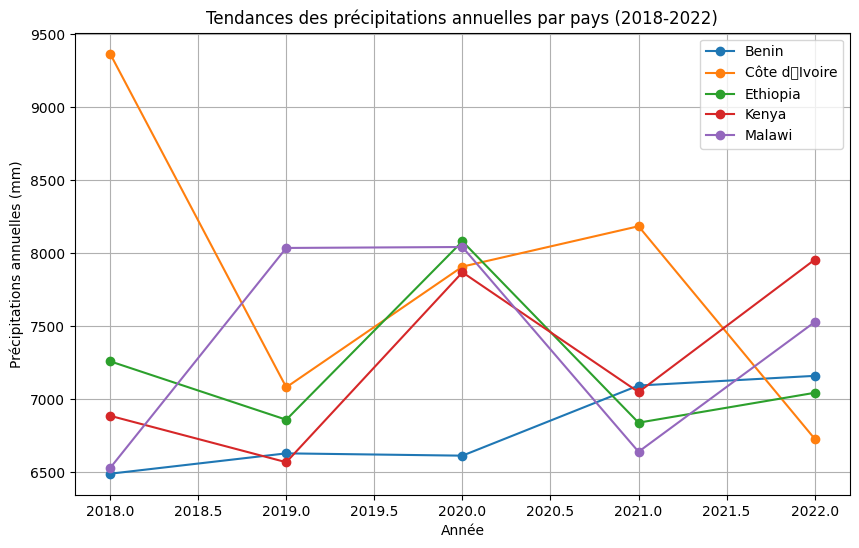

In [21]:
# ---- 3) Visualiser tendances par pays ----
plt.figure(figsize=(10, 6))
for country in precip_annual["Country"].unique():
    data = precip_annual[precip_annual["Country"] == country]
    plt.plot(data["Year"], data["Rainfall_mm"], marker="o", label=country)

plt.title("Tendances des précipitations annuelles par pays (2018-2022)")
plt.ylabel("Précipitations annuelles (mm)")
plt.xlabel("Année")
plt.legend()
plt.grid(True)
plt.show()

#### Ce graphique illustre l’évolution des précipitations annuelles (en mm) dans les cinq pays étudiés entre 2018 et 2022. On observe une variabilité interannuelle marquée : les précipitations fluctuent d’une année à l’autre pour l’ensemble des pays, avec des pics et des creux bien visibles. La Côte d’Ivoire enregistre de fortes précipitations en 2018, suivies d’une baisse marquée en 2019, puis de variations les années suivantes. Le Malawi connaît un pic en 2020, une diminution en 2021, puis une légère remontée en 2022. L’Éthiopie, le Kenya et le Bénin présentent des tendances plus modérées, bien que des variations annuelles notables soient également observées. Globalement, les niveaux de précipitations restent proches entre pays, à l’exception de certains épisodes extrêmes comme celui de la Côte d’Ivoire en 2018. Ce graphique permet ainsi de repérer les années particulièrement humides ou sèches et de comparer les tendances régionales sur la période étudiée.

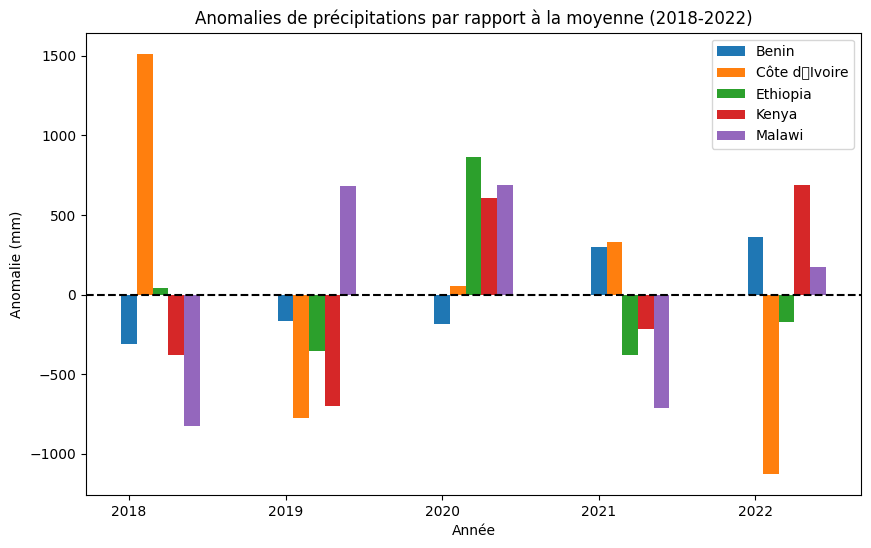

In [22]:
# ---- 4) Visualiser anomalies ----
plt.figure(figsize=(10, 6))
for country in precip_annual["Country"].unique():
    data = precip_annual[precip_annual["Country"] == country]
    plt.bar(data["Year"] + 0.1*(list(precip_annual["Country"].unique()).index(country)), 
            data["Anomaly"], width=0.1, label=country)

plt.axhline(0, color="black", linestyle="--")
plt.title("Anomalies de précipitations par rapport à la moyenne (2018-2022)")
plt.ylabel("Anomalie (mm)")
plt.xlabel("Année")
plt.legend()
plt.show()

#### Ce graphique illustre les anomalies de précipitations annuelles par rapport à la moyenne 2018-2022 pour chaque pays. Les barres situées au-dessus de zéro indiquent les années où les précipitations ont été supérieures à la moyenne nationale, tandis que celles situées en dessous représentent des années plus sèches que la normale. On observe que la Côte d’Ivoire a connu une anomalie très positive en 2018, marquant une année exceptionnellement humide, suivie d’une forte anomalie négative en 2022, caractéristique d’une année très sèche. Les autres pays présentent des alternances d’années humides et sèches, mais avec des écarts moins marqués. Ces variations importantes d’une année à l’autre traduisent une grande variabilité climatique et permettent d’identifier rapidement les années atypiques et de comparer l’intensité des anomalies entre les pays.

In [23]:
# ---- 5) Détection des anomalies fortes ----
anomalies = precip_annual[abs(precip_annual["Zscore"]) >= 2]
print("Anomalies notables détectées (Zscore >= 2) :")
print(anomalies)

Anomalies notables détectées (Zscore >= 2) :
Empty DataFrame
Columns: [Country, Year, Rainfall_mm, Anomaly, Zscore]
Index: []


In [ ]:
# Générer un DataFrame hypothétique de rendements agricoles
np.random.seed(42)
regions = df['Region'].unique()
years = df['Year'].unique()
data = []

for region in regions:
    for year in years:
        # Rendement simulé en tonnes/hectare, dépendant de la région et de l'année
        yield_value = np.random.normal(loc=2.5, scale=0.5)  # moyenne 2.5 t/ha
        data.append({'Region': region, 'Year': year, 'Yield_t_ha': round(yield_value, 2)})

df_yield = pd.DataFrame(data)
print(df_yield.head())

df_yield

    Region  Year  Yield_t_ha
0  Nairobi  2018        2.75
1  Nairobi  2019        2.43
2  Nairobi  2020        2.82
3  Nairobi  2021        3.26
4  Nairobi  2022        2.38


,Region,Year,Yield_t_ha
0,Nairobi,2018,2.75
1,Nairobi,2019,2.43
2,Nairobi,2020,2.82
3,Nairobi,2021,3.26
4,Nairobi,2022,2.38
...,...,...,...
70,Korhogo,2018,2.68
71,Korhogo,2019,3.27
72,Korhogo,2020,2.48
73,Korhogo,2021,3.28


Dans le cadre de cette analyse, un jeu de données hypothétique de rendements agricoles annuels (exprimés en tonnes par hectare) a été généré pour chaque région et chaque année de la période 2018 à 2022. Cette initiative vise à illustrer la complémentarité entre les données climatiques et agricoles pour mieux comprendre l’impact de la variabilité pluviométrique sur la production.

Le rendement moyen simulé (environ 2,5 t/ha) avec une légère dispersion (écart-type de 0,5) reflète les conditions agricoles typiques dans plusieurs régions d’Afrique subsaharienne. En croisant ces données avec les niveaux de précipitations enregistrés, il devient possible d’établir des corrélations entre anomalies pluviométriques et performances agricoles, notamment pour des cultures sensibles comme le maïs, le riz ou le coton.

Cette approche permet de mettre en évidence les zones géographiques ou les années les plus vulnérables aux déficits ou excès de pluie, et d’identifier les périodes critiques où une action d’adaptation ou de soutien est nécessaire. Elle ouvre la voie à la modélisation de seuils critiques de précipitations pour chaque culture, qui pourraient être intégrés dans des systèmes d’alerte précoce ou des outils d’aide à la décision.

En intégrant ces jeux de données complémentaires, les décideurs, chercheurs et producteurs peuvent mieux anticiper les impacts du changement climatique, ajuster les pratiques agricoles, recommander des variétés résilientes ou optimiser les calendriers agricoles, contribuant ainsi à renforcer la résilience climatique et la sécurité alimentaire.

## FIN